In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/adult_data_RenameCol_MinMax_LE.csv',index_col = 0)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,0.452055,0.048052,0.800000,0.0,0.0,0.122449,6,9,2,4,0,4,1,39,0
1,0.287671,0.137581,0.533333,0.0,0.0,0.397959,4,11,0,6,1,4,1,39,0
2,0.493151,0.150486,0.400000,0.0,0.0,0.397959,4,1,2,6,0,2,1,39,0
3,0.150685,0.220635,0.800000,0.0,0.0,0.397959,4,9,2,10,5,2,0,5,0
4,0.273973,0.184219,0.866667,0.0,0.0,0.397959,4,12,2,4,5,4,0,39,0


In [3]:
# feat_cols
feat_cols_mal = df.columns.to_list()

In [4]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [5]:
rndperm

array([14160, 27047, 28867, ...,   860, 15795, 23654])

In [6]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols_mal].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
pca_result

Explained variation per principal component: [0.59954363 0.17684719 0.14548793]


array([[-2.25585306, -2.12799473,  1.55355632],
       [-2.3317356 , -0.56047016, -0.60027774],
       [-1.87174503,  0.42386483,  9.36966552],
       ...,
       [-2.34856439, -5.65113671,  0.01044974],
       [-2.35910725, -5.59722998, -0.03385679],
       [-2.33666432, -2.59267963, -0.36781053]])

In [9]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class,pca-one,pca-two,pca-three
0,0.452055,0.048052,0.800000,0.0,0.0,0.122449,6,9,2,4,0,4,1,39,0,-2.255853,-2.127995,1.553556
1,0.287671,0.137581,0.533333,0.0,0.0,0.397959,4,11,0,6,1,4,1,39,0,-2.331736,-0.560470,-0.600278
2,0.493151,0.150486,0.400000,0.0,0.0,0.397959,4,1,2,6,0,2,1,39,0,-1.871745,0.423865,9.369666
3,0.150685,0.220635,0.800000,0.0,0.0,0.397959,4,9,2,10,5,2,0,5,0,31.799946,2.957161,-0.313542
4,0.273973,0.184219,0.866667,0.0,0.0,0.397959,4,12,2,4,5,4,0,39,0,-2.379848,-2.792493,-1.334606


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

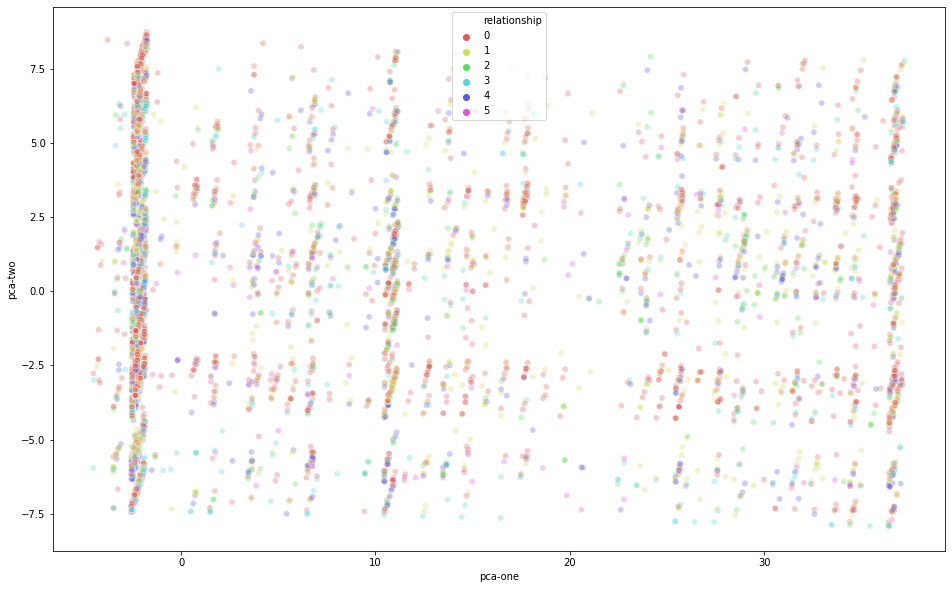

In [16]:
plt.figure(figsize=(16,10))
desired_pca_hue = 'relationship'
uniq_num = len(np.unique(df[desired_pca_hue]))
uniq_num

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=desired_pca_hue,
    palette=sns.color_palette("hls", uniq_num),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3)

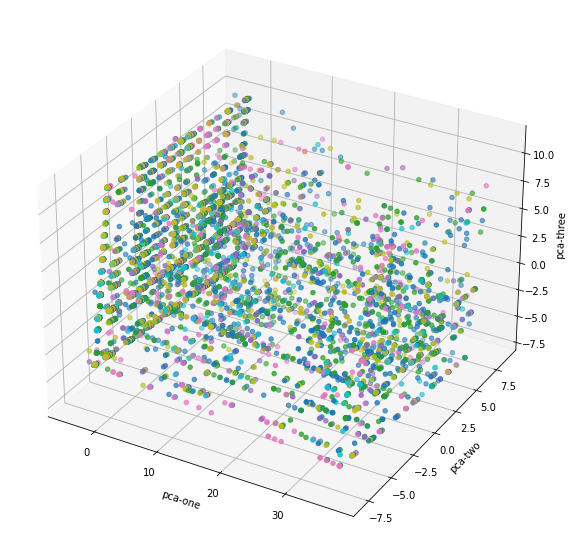

In [17]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
desired_pca_hue = 'relationship'
uniq_num = len(np.unique(df[desired_pca_hue]))
uniq_num

ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:][desired_pca_hue], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

desired_pca_hue: education-num
uniq_num_colors: 16


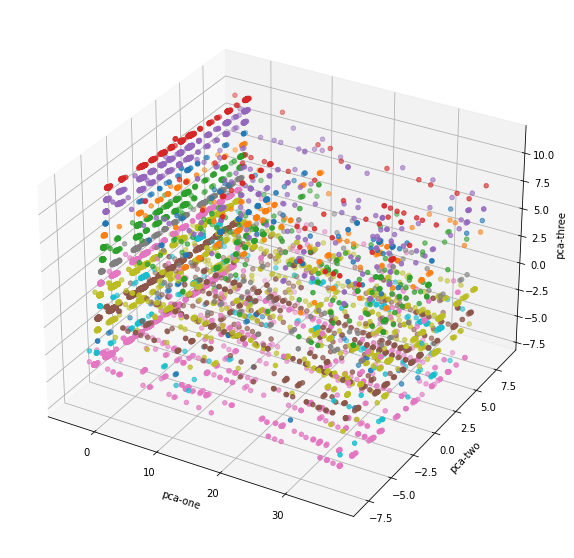

In [60]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
col_num = 2 #change
desired_pca_hue = df.columns.to_list()[col_num]
print("desired_pca_hue:",desired_pca_hue)
uniq_num = len(np.unique(df.loc[:,desired_pca_hue]))

print("uniq_num_colors:",uniq_num)

ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:][desired_pca_hue], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
#     ax.view_init(30, 185)#30, 185
plt.show()

In [51]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols_mal].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# [out] Explained variation per principal component: [0.09730166 0.07135901 0.06183721]

Explained variation per principal component: [0.60733353 0.17425219 0.1411602 ]


In [52]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.085s...
[t-SNE] Computed neighbors for 10000 samples in 1.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.388552
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.132904
[t-SNE] KL divergence after 300 iterations: 2.068982
t-SNE done! Time elapsed:

desired_pca_hue: education-num
uniq_num: 16


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

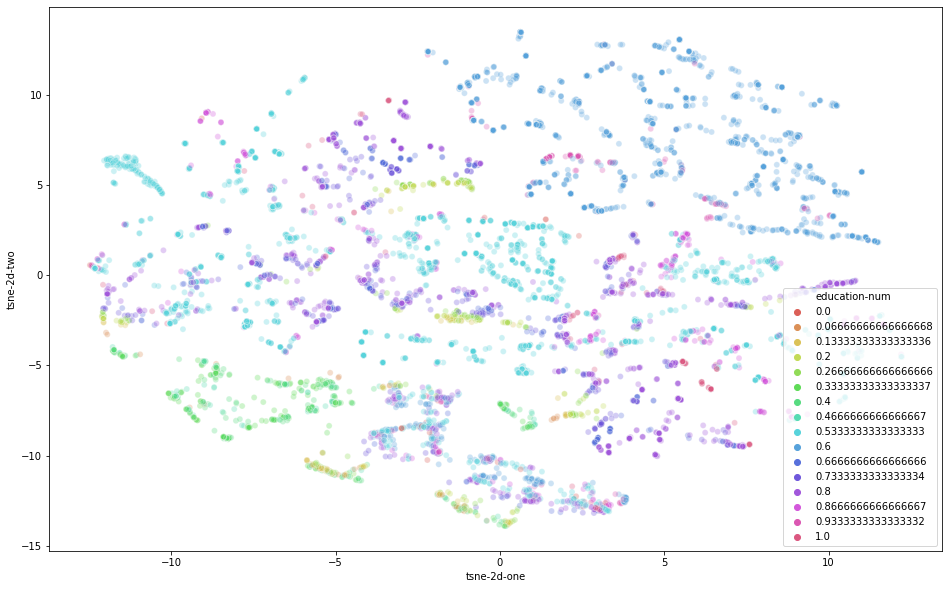

In [63]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
col_num = 2 #change

desired_pca_hue = df.columns.to_list()[col_num]
print("desired_pca_hue:",desired_pca_hue)
uniq_num = len(np.unique(df.loc[:,desired_pca_hue]))
print("uniq_num:",uniq_num)

ax.scatter

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=desired_pca_hue,
    palette=sns.color_palette("hls",  n_colors=uniq_num),
    data=df_subset,
    legend="full",
    alpha=0.3
)

desired_pca_hue: education-num
uniq_num: 16


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

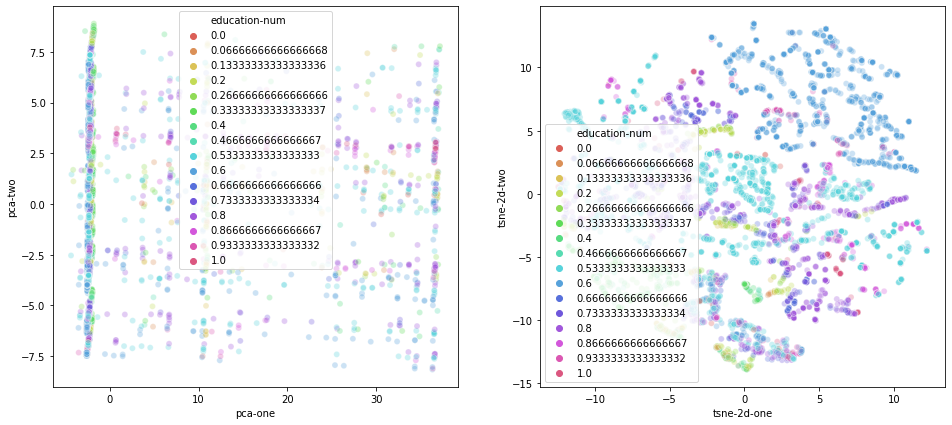

In [66]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
col_num = 2 #change

desired_pca_hue = df.columns.to_list()[col_num]
print("desired_pca_hue:",desired_pca_hue)
uniq_num = len(np.unique(df.loc[:,desired_pca_hue]))
print("uniq_num:",uniq_num)


plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=desired_pca_hue,
    palette=sns.color_palette("hls", uniq_num),
    data=df_subset,
#     legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=desired_pca_hue,
    palette=sns.color_palette("hls", uniq_num),
    data=df_subset,
#     legend="full",
    alpha=0.3,
    ax=ax2
)

In [68]:
pca_50 = PCA(n_components=15)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 1.0000000000000002


# Round up report

In [69]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 8.739986419677734 seconds


desired_pca_hue: education-num
uniq_num: 16


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

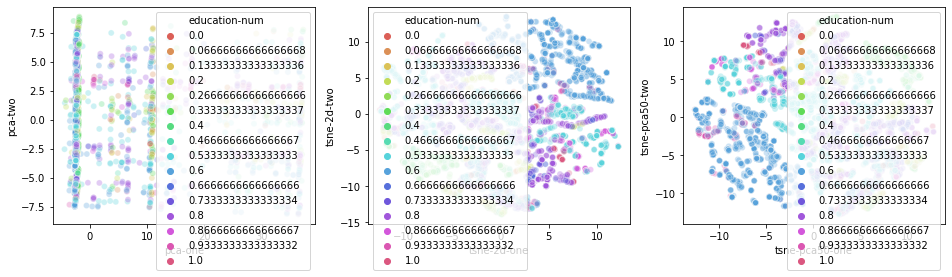

In [70]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
col_num = 2 #change

desired_pca_hue = df.columns.to_list()[col_num]
print("desired_pca_hue:",desired_pca_hue)
uniq_num = len(np.unique(df.loc[:,desired_pca_hue]))
print("uniq_num:",uniq_num)


sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=desired_pca_hue,
    palette=sns.color_palette("hls", uniq_num),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=desired_pca_hue,
    palette=sns.color_palette("hls", uniq_num),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue=desired_pca_hue,
    palette=sns.color_palette("hls", uniq_num),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

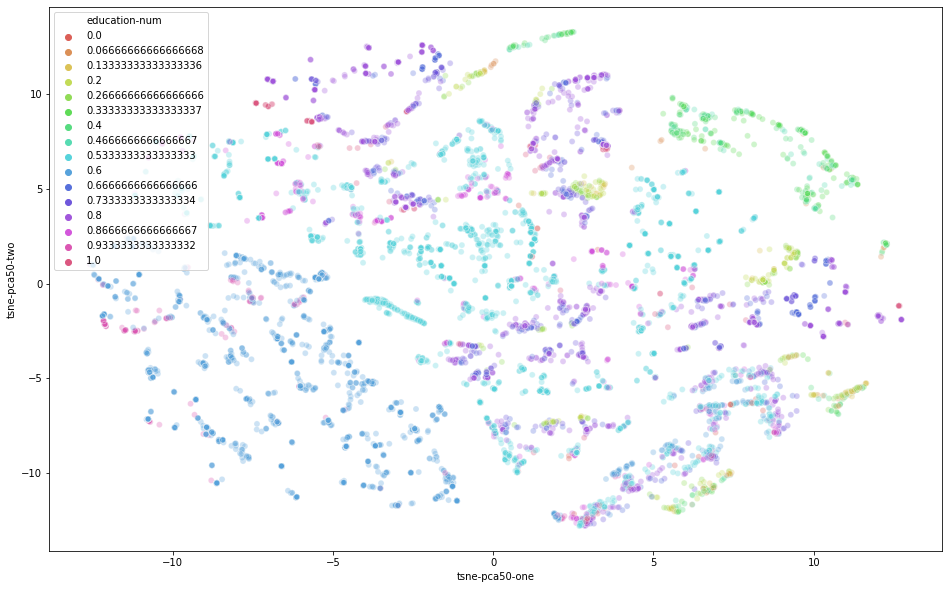

In [74]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue=desired_pca_hue,
    palette=sns.color_palette("hls", uniq_num),
    data=df_subset,
    legend="full",
    alpha=0.3,
)
plt.show()